In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [3]:
#make llm
llm = ChatOpenAI(model = 'gpt-4o')

In [4]:
#make template using chatprompttemplate
prompt = ChatPromptTemplate.from_template('Tell me a short joke about {topic}')

In [5]:
#parser
parser = StrOutputParser()

In [ ]:
#chain 

chain = prompt|llm|parser
chain.invoke({'topic':'ai'})

In [1]:

from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
llm = ChatOpenAI(model = 'gpt-4o')
template = ChatPromptTemplate.from_template('what is the meaning of {topic}')
parser = StrOutputParser()

chain = template|llm|parser
chain.invoke({'topic':'life'})

'The question of the meaning of life is a philosophical and existential one that has been pondered by humans for centuries. Different cultures, religions, and thinkers have offered various interpretations:\n\n1. **Religious Perspectives**: Many religious traditions suggest that the meaning of life is tied to a relationship with a higher power or God, fulfilling divine commandments, or reaching enlightenment. For example, in Christianity, it may involve living according to the teachings of Jesus and seeking salvation.\n\n2. **Philosophical Perspectives**: Existential philosophers like Jean-Paul Sartre and Albert Camus have argued that life has no inherent meaning, and it\'s up to individuals to create their own purpose. Conversely, others, like Aristotle, suggested that the purpose is to live a life of virtue and fulfill one\'s potential.\n\n3. **Scientific Perspectives**: From a scientific standpoint, some argue that life\'s "meaning" is survival and reproduction, as dictated by evolut

In [2]:
print(template)

input_variables=['topic'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['topic'], input_types={}, partial_variables={}, template='what is the meaning of {topic}'), additional_kwargs={})]


In [3]:
chain1 = template|llm

In [4]:
print(chain1.invoke('contraflecture in simple terms without any jargons'))

content='Contraflexure refers to a point or area on a beam or similar structure where it bends or curves in one direction on one side and in the opposite direction on the other side. Imagine a simple diving board; when someone stands in the middle, it might curve downwards. On either side of that central point, the board curves upwards. The point where these curves change direction is the point of contraflexure.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 23, 'total_tokens': 108, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_ad98c18a04', 'id': 'chatcmpl-D8lLpdu2LsTvBW76qKTdjK2D8Y5F9', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--019c56b

In [5]:
template_message = ChatPromptTemplate.from_messages([('system','you are a helpful {profession}')
,('human','what is the meaning of {topic}')
])
# chain3 = template_message|llm|parser
# chain3.invoke({'profession':'doctor','topic':'cardic arrest and heart attack in simple terms without any jargons'})

In [6]:
chain3 = template_message|llm|parser

In [7]:
chain3.invoke({'profession':'doctor','topic':'cardic arrest and heart attack in simple terms without any jargons'})

"Certainly! \n\nA **heart attack** happens when blood flow to a section of the heart is blocked. This means the heart doesn't get the oxygen it needs, and the heart muscle can get damaged or stop working properly.\n\n**Cardiac arrest** is when the heart suddenly stops beating altogether. The heart can't pump blood to the rest of the body, including the brain and lungs. This is an emergency and needs immediate medical attention, often with CPR (cardiopulmonary resuscitation) and a defibrillator.\n\nIn short:\n- Heart attack = Blocked blood flow to the heart.\n- Cardiac arrest = Heart stops beating suddenly."

In [8]:
from langchain_core.tools import tool

In [9]:
@tool

def multiply(a:float, b:float)->float:
    """
    Multiply two numbers together"""
    return a*b

In [10]:
llm_with_tools = llm.bind_tools([multiply])

In [11]:
result = llm_with_tools.invoke('What is 5 times 8?')

In [12]:
result.tool_calls

[{'name': 'multiply',
  'args': {'a': 5, 'b': 8},
  'id': 'call_tLWbpUS2o9BIR2wNXnT3O4YL',
  'type': 'tool_call'}]

In [13]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import tools_condition, ToolNode
from typing import Annotated, TypedDict, List
from langchain_core.messages import AnyMessage
import operator
from IPython.display import Image, display

In [14]:
class State(TypedDict):
    messages: Annotated[List[AnyMessage],operator.add]

def reasoner(state):
    return {'messages':[llm_with_tools.invoke(state['messages'])]}


builder = StateGraph(State)

#add nodes
builder.add_node('reasoner',reasoner)
builder.add_node('tools',ToolNode([multiply]))
builder.add_edge(START,'reasoner')
builder.add_conditional_edges('reasoner',tools_condition)
builder.add_edge('tools','reasoner')

graph = builder.compile()


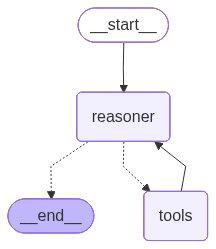

In [15]:
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [16]:
result = graph.invoke({'messages':['multiply 2 and 8']})

In [17]:
initial_state = {'messages':['Hi, how are you']}

for i in graph.stream(initial_state):
    print(i)

{'reasoner': {'messages': [AIMessage(content="Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 50, 'total_tokens': 81, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_64dfa806c7', 'id': 'chatcmpl-D8lM0jYrE38azwVtjzdFeDwEc1IWO', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c56b1-e0ec-7832-9b6d-904b306f585c-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 50, 'output_tokens': 31, 'total_tokens': 81, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, '

In [18]:
from langgraph.checkpoint.memory import MemorySaver

In [19]:
memory = MemorySaver()

In [20]:
config = {'configurable': {'thread_id':2}}

In [21]:
graph = builder.compile(checkpointer = memory)

In [22]:
input1 = {'messages':[('user','My name is alice')]}

In [23]:
for i in graph.stream(input1,config = config):
    print(i)

{'reasoner': {'messages': [AIMessage(content='Hello Alice! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 49, 'total_tokens': 60, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_64dfa806c7', 'id': 'chatcmpl-D8lM1yLl6m0PexAHGM7v3xH4mSEwQ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c56b1-e6b6-7121-a386-89dbccd23c8a-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 49, 'output_tokens': 11, 'total_tokens': 60, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [24]:
input2 = {'messages':[('user','what is my name')]}
for i in graph.stream(input2,config = config):
    for value in i.values():
        print(value['messages'][-1].content)

Your name is Alice.


In [25]:
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_core.documents import Document
docs = [
    Document('LangGraph was released in Jan 2024 by Harrison Chase.',metadata = {'source':'tweet'}),
    Document('The secret code to the vault is 9999.', metadata = {'source':'secret_file'})
]
embeddings = OpenAIEmbeddings(model = 'text-embedding-3-small')
vector_store = Chroma.from_documents(docs,embeddings)
retreiver = vector_store.as_retriever(search_kwargs = {'k':1})

In [30]:
result = retreiver.invoke('What is the weather?')

In [31]:
print(result[0].page_content)

LangGraph was released in Jan 2024 by Harrison Chase.


In [35]:
from langchain_core.tools.retriever import create_retriever_tool

In [36]:
from langchain_core.tools.retriever import create_retriever_tool

tool_name = "search_company_policy"
tool_description = "Searches for internal company policies, security codes, and employee handbooks."

# This wraps the retriever into a standard Tool format the LLM understands
retriever_tool = create_retriever_tool(
    retreiver,
    tool_name,
    tool_description
)

# Verify it's a tool
print(f"Tool Created: {retriever_tool.name}")

Tool Created: search_company_policy


In [39]:
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

In [40]:
documents = [
    Document(
        page_content="The secret code to the server room is 'Blue-Bananas-99'.",
        metadata={"source": "security_manual_v1.txt"}
    ),
    Document(
        page_content="Employees can take unlimited vacation if they finish all tasks.",
        metadata={"source": "hr_policy.pdf"}
    ),
]

# 2. Initialize the Embedding Model (The Translator)
# This turns text into a list of numbers (vectors)
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# 3. Create the Database
# We put documents in, and it indexes them for search
vector_store = Chroma.from_documents(
    documents=documents,
    embedding=embeddings,
    collection_name="my_private_knowledge" # Name your collection
)

# 4. Create the Retriever
# This is the interface for searching the database
retriever = vector_store.as_retriever(search_kwargs={"k": 1}) # k=1 means "return top 1 result"

# TEST IT: Does it find the secret?
print("--- Testing Retrieval ---")
result = retriever.invoke("What is the code?")
print(f"Found document: {result[0].page_content}")

--- Testing Retrieval ---
Found document: The secret code to the server room is 'Blue-Bananas-99'.


In [42]:
from langchain_core.tools.retriever import create_retriever_tool

In [43]:
tool_name = 'search_company_policy'
tool_description = 'Searches for internal company policy, security codes and employee handbooks '

In [44]:
retriever_tool = create_retriever_tool(retriever, tool_name, tool_description)

In [45]:
from langgraph.graph import StateGraph, START
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver
from langchain_openai import ChatOpenAI
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages

# --- SETUP ---
# 1. Tools
tools = [retriever_tool] # Add our new RAG tool here

# 2. Model
llm = ChatOpenAI(model="gpt-4o", temperature=0) # Low temp = more factual
llm_with_tools = llm.bind_tools(tools)

# 3. State
class State(TypedDict):
    messages: Annotated[list, add_messages]

# 4. Nodes
def reasoner(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# 5. Graph Construction
builder = StateGraph(State)
builder.add_node("reasoner", reasoner)
builder.add_node("tools", ToolNode(tools)) # Helper to run tool calls

# Logic
builder.add_edge(START, "reasoner")
builder.add_conditional_edges("reasoner", tools_condition)
builder.add_edge("tools", "reasoner")

# 6. Compile with Memory
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

# --- EXECUTION ---
config = {"configurable": {"thread_id": "employee_123"}}

print("\n--- Question 1: Casual Chat (Should NOT use tool) ---")
input1 = {"messages": [("user", "Hi, I'm new here!")]}
for update in graph.stream(input1, config=config):
    # Print the last message from the update
    for key, value in update.items():
        print(f"Node '{key}': {value['messages'][-1].content}")

print("\n--- Question 2: Specific Knowledge (SHOULD use tool) ---")
input2 = {"messages": [("user", "I need to get into the server room. What is the code?")]}
for update in graph.stream(input2, config=config):
    for key, value in update.items():
        # If it's a tool message, it might look messy, so we handle it
        msg = value['messages'][-1]
        if hasattr(msg, 'tool_calls') and len(msg.tool_calls) > 0:
             print(f"Node '{key}': Decided to call tool -> {msg.tool_calls[0]['name']}")
        elif msg.type == 'tool':
             print(f"Node '{key}': Tool Output -> {msg.content}")
        else:
             print(f"Node '{key}': Final Answer -> {msg.content}")


--- Question 1: Casual Chat (Should NOT use tool) ---
Node 'reasoner': Welcome! How can I assist you today? If you have any questions about the company, policies, or anything else, feel free to ask.

--- Question 2: Specific Knowledge (SHOULD use tool) ---
Node 'reasoner': Decided to call tool -> search_company_policy
Node 'tools': Tool Output -> The secret code to the server room is 'Blue-Bananas-99'.
Node 'reasoner': Final Answer -> The access code to the server room is "Blue-Bananas-99". Please ensure you follow all security protocols when accessing the server room. If you have any other questions or need further assistance, feel free to ask!


In [1]:
from langchain_core.messages import AIMessage

In [2]:
ai_message = AIMessage(content = 'you are abhishek')
